In [15]:
# Automatically reloads imported files: this is not done manually by ipynb; this magic command tells the compiler that each time we update an imported file we want to reload it
%load_ext autoreload
# Reload all modules before executing code
%autoreload 2

#change


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import sys,os

sys.path.append(os.getcwd())



In [17]:
#Spip list | grep tensorflow
import sys,os
sys.path.append(os.getcwd())
from main import DL


In [18]:
test = DL()

In [23]:
test.importData(isTesting = True)

TestingData//20250331_LiquidPhantomValidations/6mm_Submarine _Crop_test/DL_nImages1.mat
TestingData//20250331_LiquidPhantomValidations/6mm_Submarine_Crop_test/DL_nImages1.mat
TestingData/1000_CSH_DTOP_4_6/DL_nImages1000.mat
TestingData/1003_nocodeshift_fordebug/DL_nImages1000 (2).mat
TestingData/1004_CSH_0_10_DTOP_1000/DL_nImages1000.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift/nImages210.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_PpIX_real/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_PpIX_real/nImages210.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_const_op_non_linear_fx/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_const_op_non_linear_fx/nImages210.mat
TestingData/1127_Mandolin_contour_tumours_1_10_shift_tumour_16_21_const_op/Parameters.mat
TestingData/1127_Mandolin_contour_tumours_1_10_shift_tumour_16_21_const_op/nImages60.mat
TestingData/1201_variable_OP_co

c:\Users\Hikaru Kurosawa\Documents\GitHub\gtxDLPythonCode\DataImport.py:455: SyntaxWarning: invalid escape sequence '\L'
  loadFile = input('Enter the general and specific directory (e.g. meshLRTests\\\LR2e-5) pertaining to the .h5 (weights) file you would like to load: ')


ParamValidationError: Parameter validation failed:
Invalid length for parameter Key, value: 0, valid min length: 1

In [5]:
test.Train()


TrainingData/1127_Mandolin_Tumours_5000_0_5_10_shift_tumour_1_15_scaled_rotated_shift_combined_withCSH_5000/Parameters.mat
TrainingData/1127_Mandolin_Tumours_5000_0_5_10_shift_tumour_1_15_scaled_rotated_shift_combined_withCSH_5000/nImages10000.mat
TrainingData/1209_Mandolin_Tumours_160_1_10_shift_1_15_for_training/Parameters.mat
TrainingData/1209_Mandolin_Tumours_160_1_10_shift_1_15_for_training/nImages150.mat
TrainingData/1216_CSH_10000_training_submarine_fHb_0_5_to_10_for_sampling_depth_testing/DL_nImages10000.mat
TrainingData/1216_CSH_10000_training_submarine_fHb_0_5_to_10_for_sampling_depth_testing/Parameters.mat
TrainingData/20240517_Elise_CSH_10000_Shallow_LargerWidth_largerFOV_low_res_R_only/DL_nImages10000.mat
TrainingData/20240517_Elise_CSH_10000_Shallow_LargerWidth_largerFOV_low_res_R_only/Parameters.mat
TrainingData/20240624_CSHsubmarine_TBR/Classify_nImages10000.mat
TrainingData/20240624_CSHsubmarine_TBR/Classify_nImages210.mat
TrainingData/20240624_CSHsubmarine_TBR/DL_nIma

c:\Users\Hikaru Kurosawa\Documents\GitHub\gtxDLPythonCode\DataImport.py:624: SyntaxWarning: invalid escape sequence '\L'
  loadFile = input('Enter the general and specific directory (e.g. meshLRTests\\\LR2e-5) pertaining to the .h5 (weights) file you would like to load: ')


ParamValidationError: Parameter validation failed:
Invalid length for parameter Key, value: 0, valid min length: 1

In [ ]:
test.upload_to_S3()

In [19]:
test.load()


ModelParameters/0307_3D_noise_no_dropout_at_beg/Default.keras
ModelParameters/20241116_MCX_SmallHighRes_1e7/Default6Fx_HighRes_SmallFOV.keras
ModelParameters/20241120_5xfHb_0.5xStO2_FixedRefl_MCX/Default6Fx_64x64 (1).keras
ModelParameters/20241203_CSH_2xMus_0.5xStO2/Default6Fx_64x64.keras
ModelParameters/20250108_0_5_to_solid_periphery_concentration/Default.keras
ModelParameters/20250108_u_net_with_attention_0_5_to_2_and_solid_periphery_concentration/Default.keras
ModelParameters/20250116_u_net_CSH_10000_with_protrusions_0_3/Default.keras
ModelParameters/20250122_OP_FL_attention_u_net_2D/Default.keras
ModelParameters/20250127_attention_u_net_fHb_0_5_100/Default.keras
ModelParameters/20250127_u_net_attention_fHb_5_to_60/Default.keras
ModelParameters/20250204_periphery_concentration_0_5_to_solid_fHb_0_5_to_100/Default.keras
ModelParameters/20250228_with_dropout_OP_FL_U_net/Default.keras
ModelParameters/20250301_with_randomized_crop_OP_FL_U_net_with_dropout_at_intermediate/Default.keras
M

In [ ]:
test.modelD.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(6):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.FL[0, :, :, i, 0])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data), cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

TestingData//20250331_LiquidPhantomValidations/6mm_Submarine _Crop_test/DL_nImages1.mat
TestingData//20250331_LiquidPhantomValidations/6mm_Submarine_Crop_test/DL_nImages1.mat
TestingData/1000_CSH_DTOP_4_6/DL_nImages1000.mat
TestingData/1003_nocodeshift_fordebug/DL_nImages1000 (2).mat
TestingData/1004_CSH_0_10_DTOP_1000/DL_nImages1000.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift/nImages210.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_PpIX_real/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_PpIX_real/nImages210.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_const_op_non_linear_fx/Parameters.mat
TestingData/1127_Mandolin_Tumours_210_1_10_shift_const_op_non_linear_fx/nImages210.mat
TestingData/1127_Mandolin_contour_tumours_1_10_shift_tumour_16_21_const_op/Parameters.mat
TestingData/1127_Mandolin_contour_tumours_1_10_shift_tumour_16_21_const_op/nImages60.mat
TestingData/1201_variable_OP_co

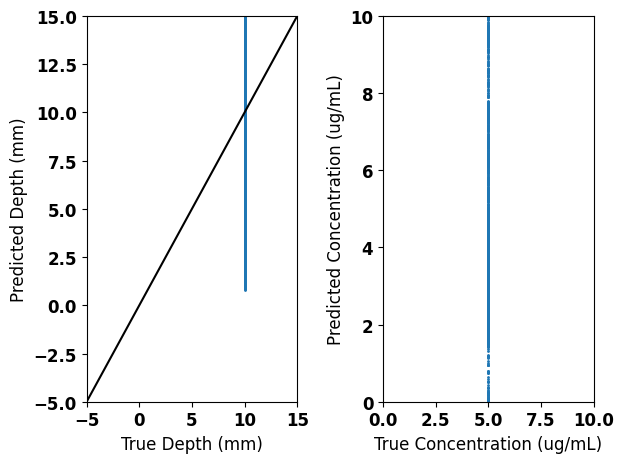

()
(1, 101, 101)


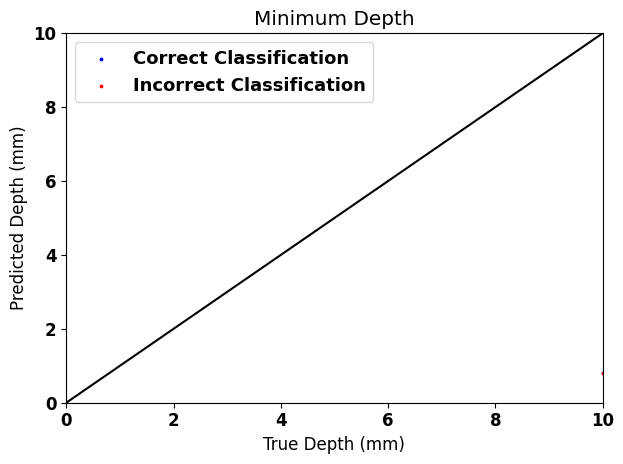

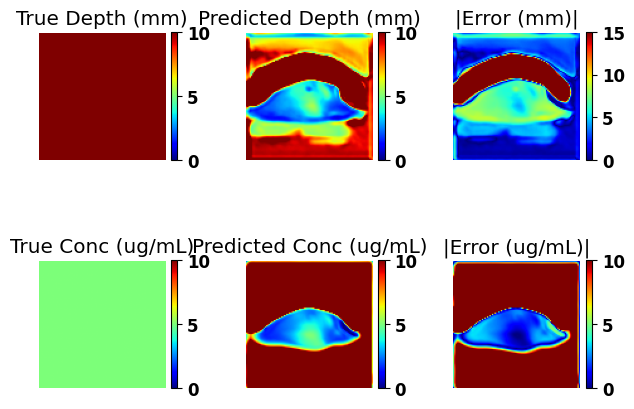

In [24]:
test.Analysis()

In [44]:
print(test.DFP_min)

AttributeError: 'DL' object has no attribute 'DFP_min'

In [ ]:
print(test.DF_min)

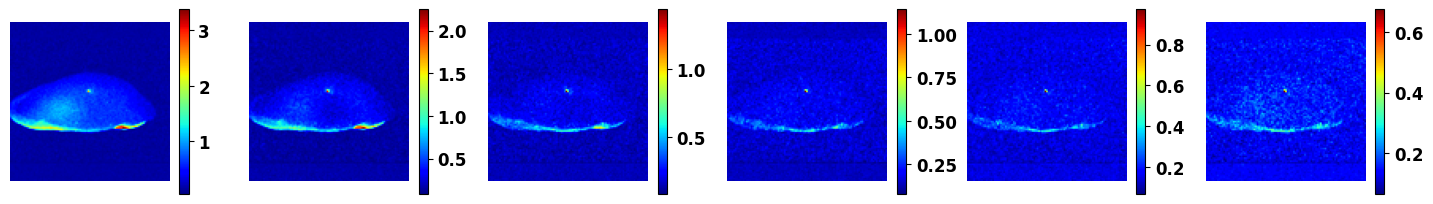

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(6):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.FL[0, :, :, i])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data) * 0.7, cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

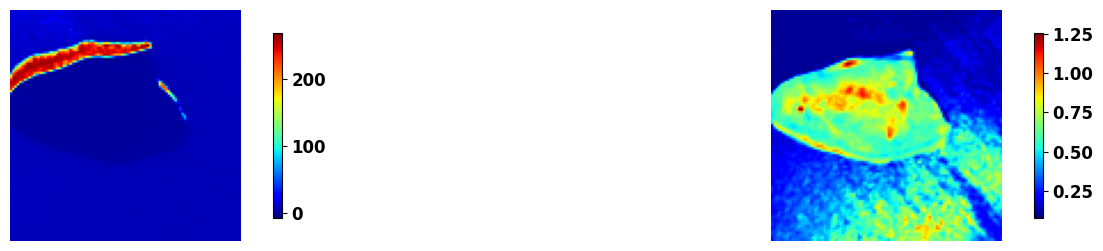

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(2):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.OP[0, :, :, i])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data), cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

In [ ]:
#visualization of the filters and feature maps 
conv_layers = []
for layer in test.modelD.layers:
    
    if 'conv' not in layer.name:
        continue    

    conv_layers.append(layer)
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

In [ ]:
# retrieve weights from the second hidden layer

filters, bias = conv_layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
from matplotlib import pyplot
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,0,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [ ]:
#list out convolutional layer indexes 
for i in range(len(test.modelD.layers)):
    layer = test.modelD.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

In [ ]:
#define the model 
test.visualize_feature_maps(65)

In [ ]:
#plot original image
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(18, 3))  # Create a 1x6 grid of subplots with a specific size

for i in range(6):
    ax = axes[i]  # Access each axis
    img_data = np.squeeze(test.FL[0, :, :, i])
    img = ax.imshow(img_data,vmin=np.min(img_data), vmax=np.max(img_data), cmap='jet')  # Display the image
    ax.axis('off')  # Turn off both axes and ticks

    cbar = fig.colorbar(img, ax=ax, shrink=0.8)  # Shrink the colorbar to 80% of its size

plt.show()

In [ ]:
#calculating features_map
from matplotlib import pyplot
features = test.modelD_visualize.predict([test.OP, test.FL], batch_size = 1)
print(features.shape)



fig = pyplot.figure(figsize=(20, 15))
for x in range(1):
    #define new figure
    fig, ax = plt.subplots(8, 8)
    for i in range(1,features.shape[-1]+1):
        #plt.subplot(8, 8,i)
        ax[(i-1)//8, (i-1)%8].imshow(features[0,:,:,i-1] , cmap='gray')
        ax[(i-1)//8, (i-1)%8].axis('off')
    
pyplot.show()

In [ ]:
#load phantom data with different depths, check intensity values at each spatial frequency 
test.import_data_for_testing()


In [ ]:
print(test.FL.shape)

In [ ]:
fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, np.max(test.FL[i], axis = (0,1)))
    plt.ylabel('Max Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title('Tumour 4 Max Intensity')


In [ ]:
#analyze only the middle portion 
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, np.mean(test.FL[i,40:60,40:60], axis = (0,1)))
    plt.ylabel('Mean Fluorescence Intensity')
    plt.xlabel('Fx')
    plt.title('Tumour 4 Mean Intensity')

In [ ]:
#analyze only the middle pixel 
for i in range(test.FL.shape[0]):
    #for x in range(test.FL.shape[-1]):
    plt.plot(fx, test.FL[i,50,50])
    plt.ylabel('Pixel Wise Intensity')
    plt.xlabel('Fx')
    plt.title('Pixel Wise Intensity')

In [ ]:
#obtain the slope 
x_vec = np.linspace(1,5, 5)
print(x)
#for i in range(test.FL.shape[0]-1):
for x in range(test.FL.shape[0]):
    slope = [test.FL[x,50,50,i] - test.FL[x,50,50, i+1] for i in range(test.FL.shape[-1]-1)]
    print(slope)
    #for x in range(test.FL.shape[-1]):
    plt.plot(x_vec, slope)
    plt.ylabel('Pixel Wise Derivative')
    plt.xlabel('Fx')
    plt.title('Pixel Wise Derivative')

In [ ]:
#obtain the slope 
x_vec = np.linspace(1,5, 5)
for i in range(test.FL.shape[-1]-1):
    for x in range(test.FL.shape[0]):
        slope = test.FL[x,50,50,i] - test.FL[x,50,50, i+1]#test.FL[x,50,50,0] - test.FL[x,50,50, 1]
        depth = test.DF[x,50,50]
        #for x in range(test.FL.shape[-1]):
        plt.scatter(depth, slope, s=4, c = 'b')
        plt.ylabel('Pixel Wise fluorescence derivative')
        plt.xlabel('Depth')

    plt.show()
